In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor, LinearRegression, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [363]:
df= pd.read_csv("merged_data_cleaned.csv")

In [563]:
df.head(3)

,species,country_of_origin,variety,processing_method,moisture,color,altitude_low_meters,altitude_high_meters,altitude_mean_meters,total_cup_points
1,Arabica,Ethiopia,Other,Washed / Wet,0.12,Green,1950.0,2200.0,2075.0,89.92
4,Arabica,Ethiopia,Other,Washed / Wet,0.12,Green,1950.0,2200.0,2075.0,88.83
9,Arabica,Ethiopia,Other,Natural / Dry,0.10,Green,1795.0,1850.0,1822.5,88.25


# Data Cleaning

In [365]:
df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [366]:
# drop unused columns

df= df[['Species', 'Country.of.Origin', 'Variety','Processing.Method', 'Moisture', 
    'Color', 'unit_of_measurement','altitude_low_meters', 'altitude_high_meters', 
    'altitude_mean_meters', 'Total.Cup.Points']]

In [368]:
# rename column

df.columns= df.columns.str.replace('.', '_')

df.columns= df.columns.str.lower()

C:\Users\Anjelito\AppData\Local\Temp/ipykernel_23192/1475480223.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns= df.columns.str.replace('.', '_')


In [369]:
df.head()

,species,country_of_origin,variety,processing_method,moisture,color,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,total_cup_points
0,Arabica,Ethiopia,NaN,Washed / Wet,0.12,Green,m,1950.0,2200.0,2075.0,90.58
1,Arabica,Ethiopia,Other,Washed / Wet,0.12,Green,m,1950.0,2200.0,2075.0,89.92
2,Arabica,Guatemala,Bourbon,NaN,0.00,NaN,m,1600.0,1800.0,1700.0,89.75
3,Arabica,Ethiopia,NaN,Natural / Dry,0.11,Green,m,1800.0,2200.0,2000.0,89.00
4,Arabica,Ethiopia,Other,Washed / Wet,0.12,Green,m,1950.0,2200.0,2075.0,88.83


In [371]:
# convert feet to m

mask = df['unit_of_measurement'].eq('feet')
df.loc[mask, ['altitude_low_meters','altitude_mean_meters', "altitude_high_meters"]] /= 3.281

df= df.drop(columns= "unit_of_measurement")

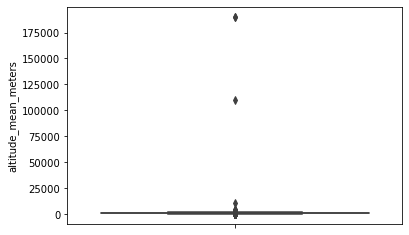

In [372]:
# drop outliers in altitude column

sns.boxplot(data= df, y= "altitude_mean_meters")

plt.show()

In [374]:
df= df[~(np.abs(stats.zscore(df["altitude_mean_meters"])) > 3)]

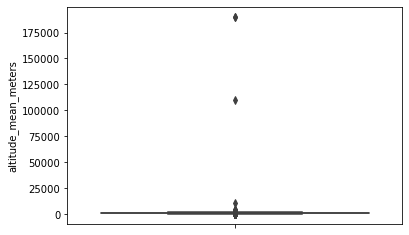

In [376]:
sns.boxplot(data= df, y= "altitude_mean_meters")

plt.show()

In [377]:
df= df[~(df["altitude_mean_meters"] > 10000)]

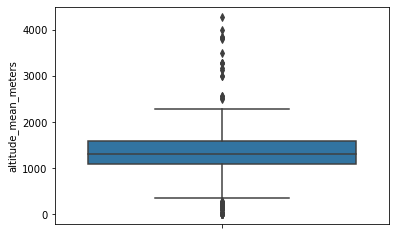

In [378]:
sns.boxplot(data= df, y= "altitude_mean_meters")

plt.show()

In [379]:
# check null column

df.isnull().sum()

species                   0
country_of_origin         1
variety                 226
processing_method       170
moisture                  0
color                   218
altitude_low_meters     230
altitude_high_meters    230
altitude_mean_meters    230
total_cup_points          0
dtype: int64

In [380]:
# drop na columns

len(df)

1335

In [381]:
df= df.dropna(how= "any")

In [382]:
len(df)

904

# EDA

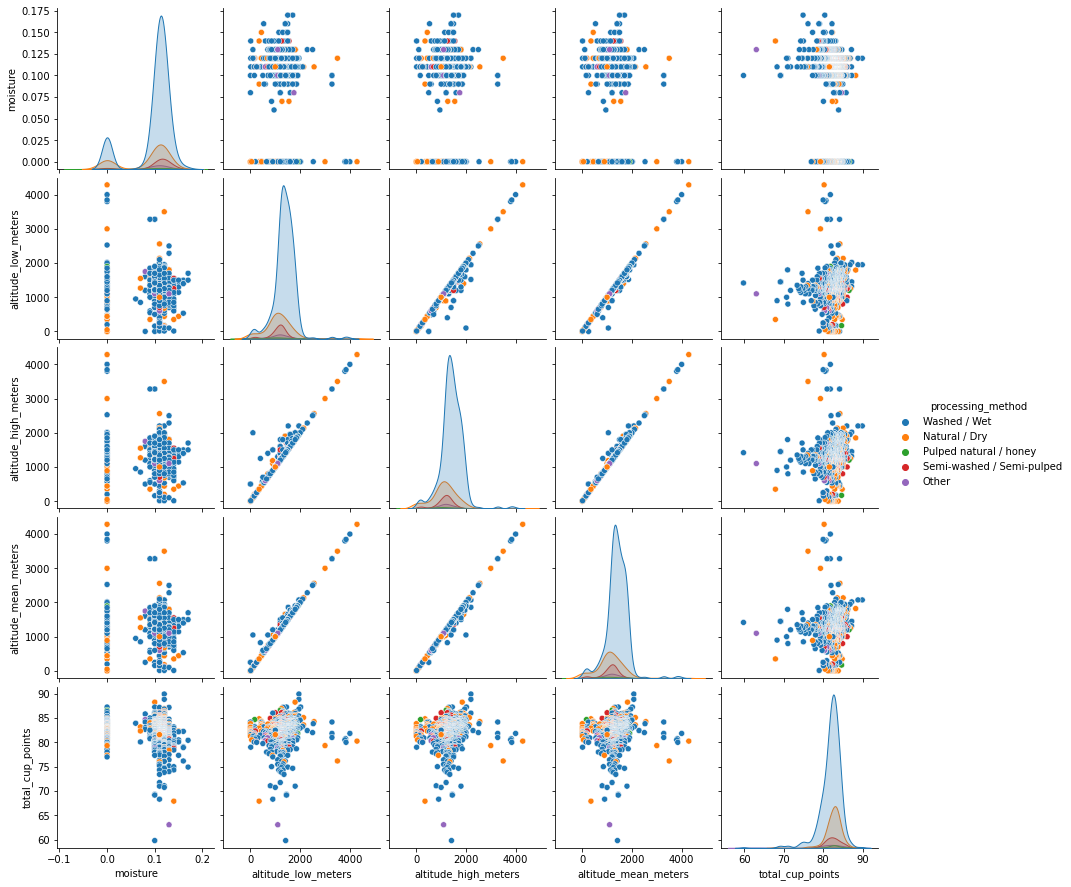

In [384]:
sns.pairplot(data= df, hue= "processing_method")

plt.show()

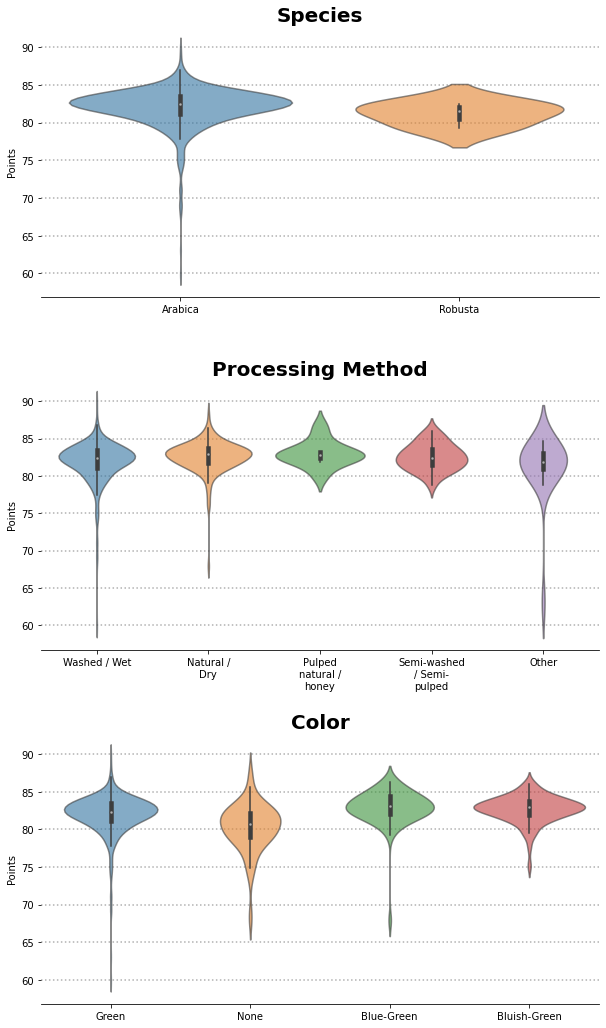

In [385]:
data= ['species', 'processing_method', 'color']

fig, axs = plt.subplots(nrows=3, figsize=(10,18))

sns.violinplot(data= df, x= data[0], y= "total_cup_points", ax= axs[0], palette= "tab10")
sns.violinplot(data= df, x= data[1], y= "total_cup_points", ax= axs[1], palette= "tab10")
sns.violinplot(data= df, x= data[2], y= "total_cup_points", ax= axs[2], palette= "tab10")

title= [data[0].title(), data[1].title(), data[2].title()]
title = [i.replace('_', ' ') for i in title]

for i in range(3):
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].grid(axis= "y", linestyle=':', linewidth= 1.5)
    axs[i].set_axisbelow(True)
    axs[i].set_ylabel("Points")
    axs[i].set_xlabel("")
    axs[i].set_title(title.pop(0), fontsize= 20, fontweight= "bold", pad= 0)
    plt.setp(axs[i].collections, alpha=.6)  
    
import textwrap
axs[1].set_xticklabels([textwrap.fill(e, 12) for e in df["processing_method"].unique().tolist()])
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.show()

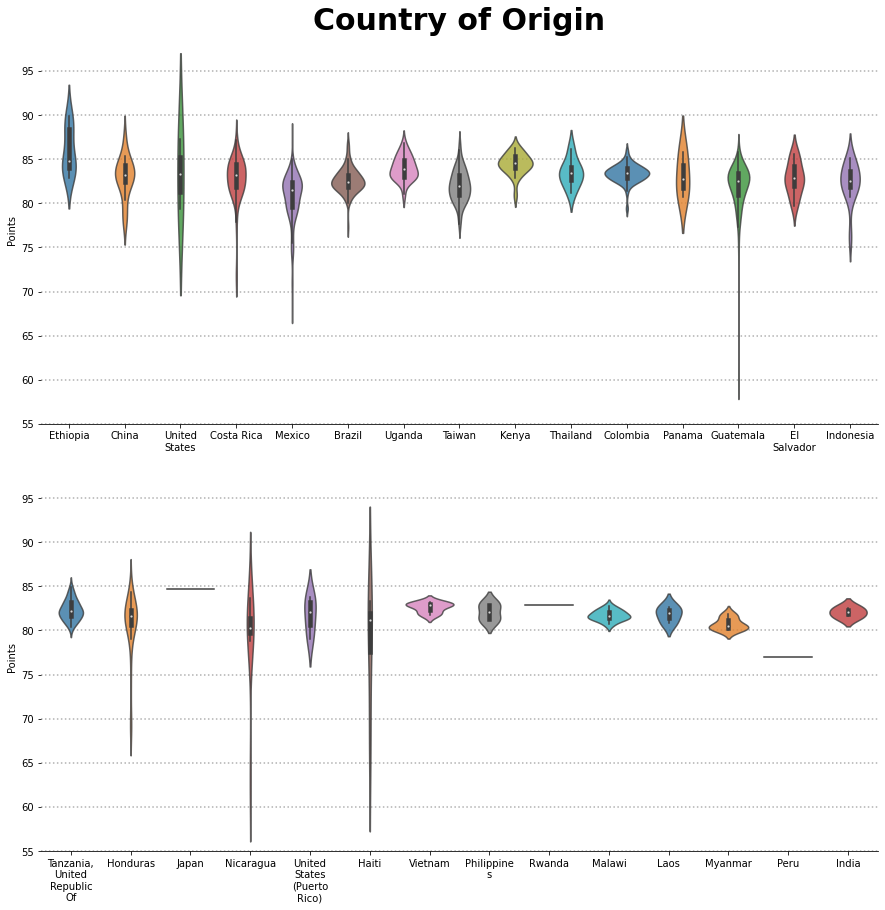

In [386]:
data1= df[df["country_of_origin"].isin(['Ethiopia', 'China', 'United States', 'Costa Rica', 'Mexico',
       'Brazil', 'Uganda', 'Taiwan', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Guatemala', 'El Salvador', 'Indonesia'])]
data2= df[~df["country_of_origin"].isin(['Ethiopia', 'China', 'United States', 'Costa Rica', 'Mexico',
       'Brazil', 'Uganda', 'Taiwan', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Guatemala', 'El Salvador', 'Indonesia'])]

x= "country_of_origin"

fig, axs = plt.subplots(nrows=2, figsize=(15,15))

sns.violinplot(data= data1, x= x, y= "total_cup_points", ax= axs[0], palette= "tab10")
sns.violinplot(data= data2, x= x, y= "total_cup_points", ax= axs[1], palette= "tab10")

# title= [data[0].title(), data[1].title(), data[2].title()]
# title = [i.replace('_', ' ') for i in title]

for i in range(2):
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].grid(axis= "y", linestyle=':', linewidth= 1.5)
    axs[i].set_axisbelow(True)
    axs[i].set_ylabel("Points")
    axs[i].set_xlabel("")
    axs[i].set_ylim([55, 99])
    plt.setp(axs[i].collections, alpha=.8)  
    
axs[0].set_xticklabels([textwrap.fill(e, 10) for e in data1["country_of_origin"].unique().tolist()])
axs[1].set_xticklabels([textwrap.fill(e, 10) for e in data2["country_of_origin"].unique().tolist()])
axs[0].set_title("Country of Origin", fontsize= 30, fontweight= "bold", pad= 0)


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
plt.show()

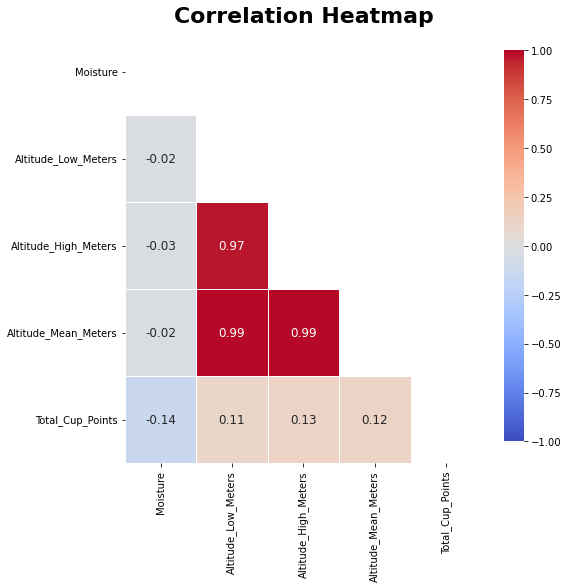

In [388]:
data= df.corr()

fig, ax = plt.subplots(figsize=(8, 8))

mask = np.triu(np.ones_like(data, dtype = bool))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(data = data, mask = mask, annot=True, fmt=".2f", cmap=cmap, linewidths= 1, 
            vmin=-1, vmax=1, cbar_kws={"shrink": 0.9}, annot_kws={"size":12})

yticks = [i.title() for i in data.index]
xticks = [i.title() for i in data.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
plt.title("Correlation Heatmap", fontsize=22, fontweight= "bold")
plt.show()

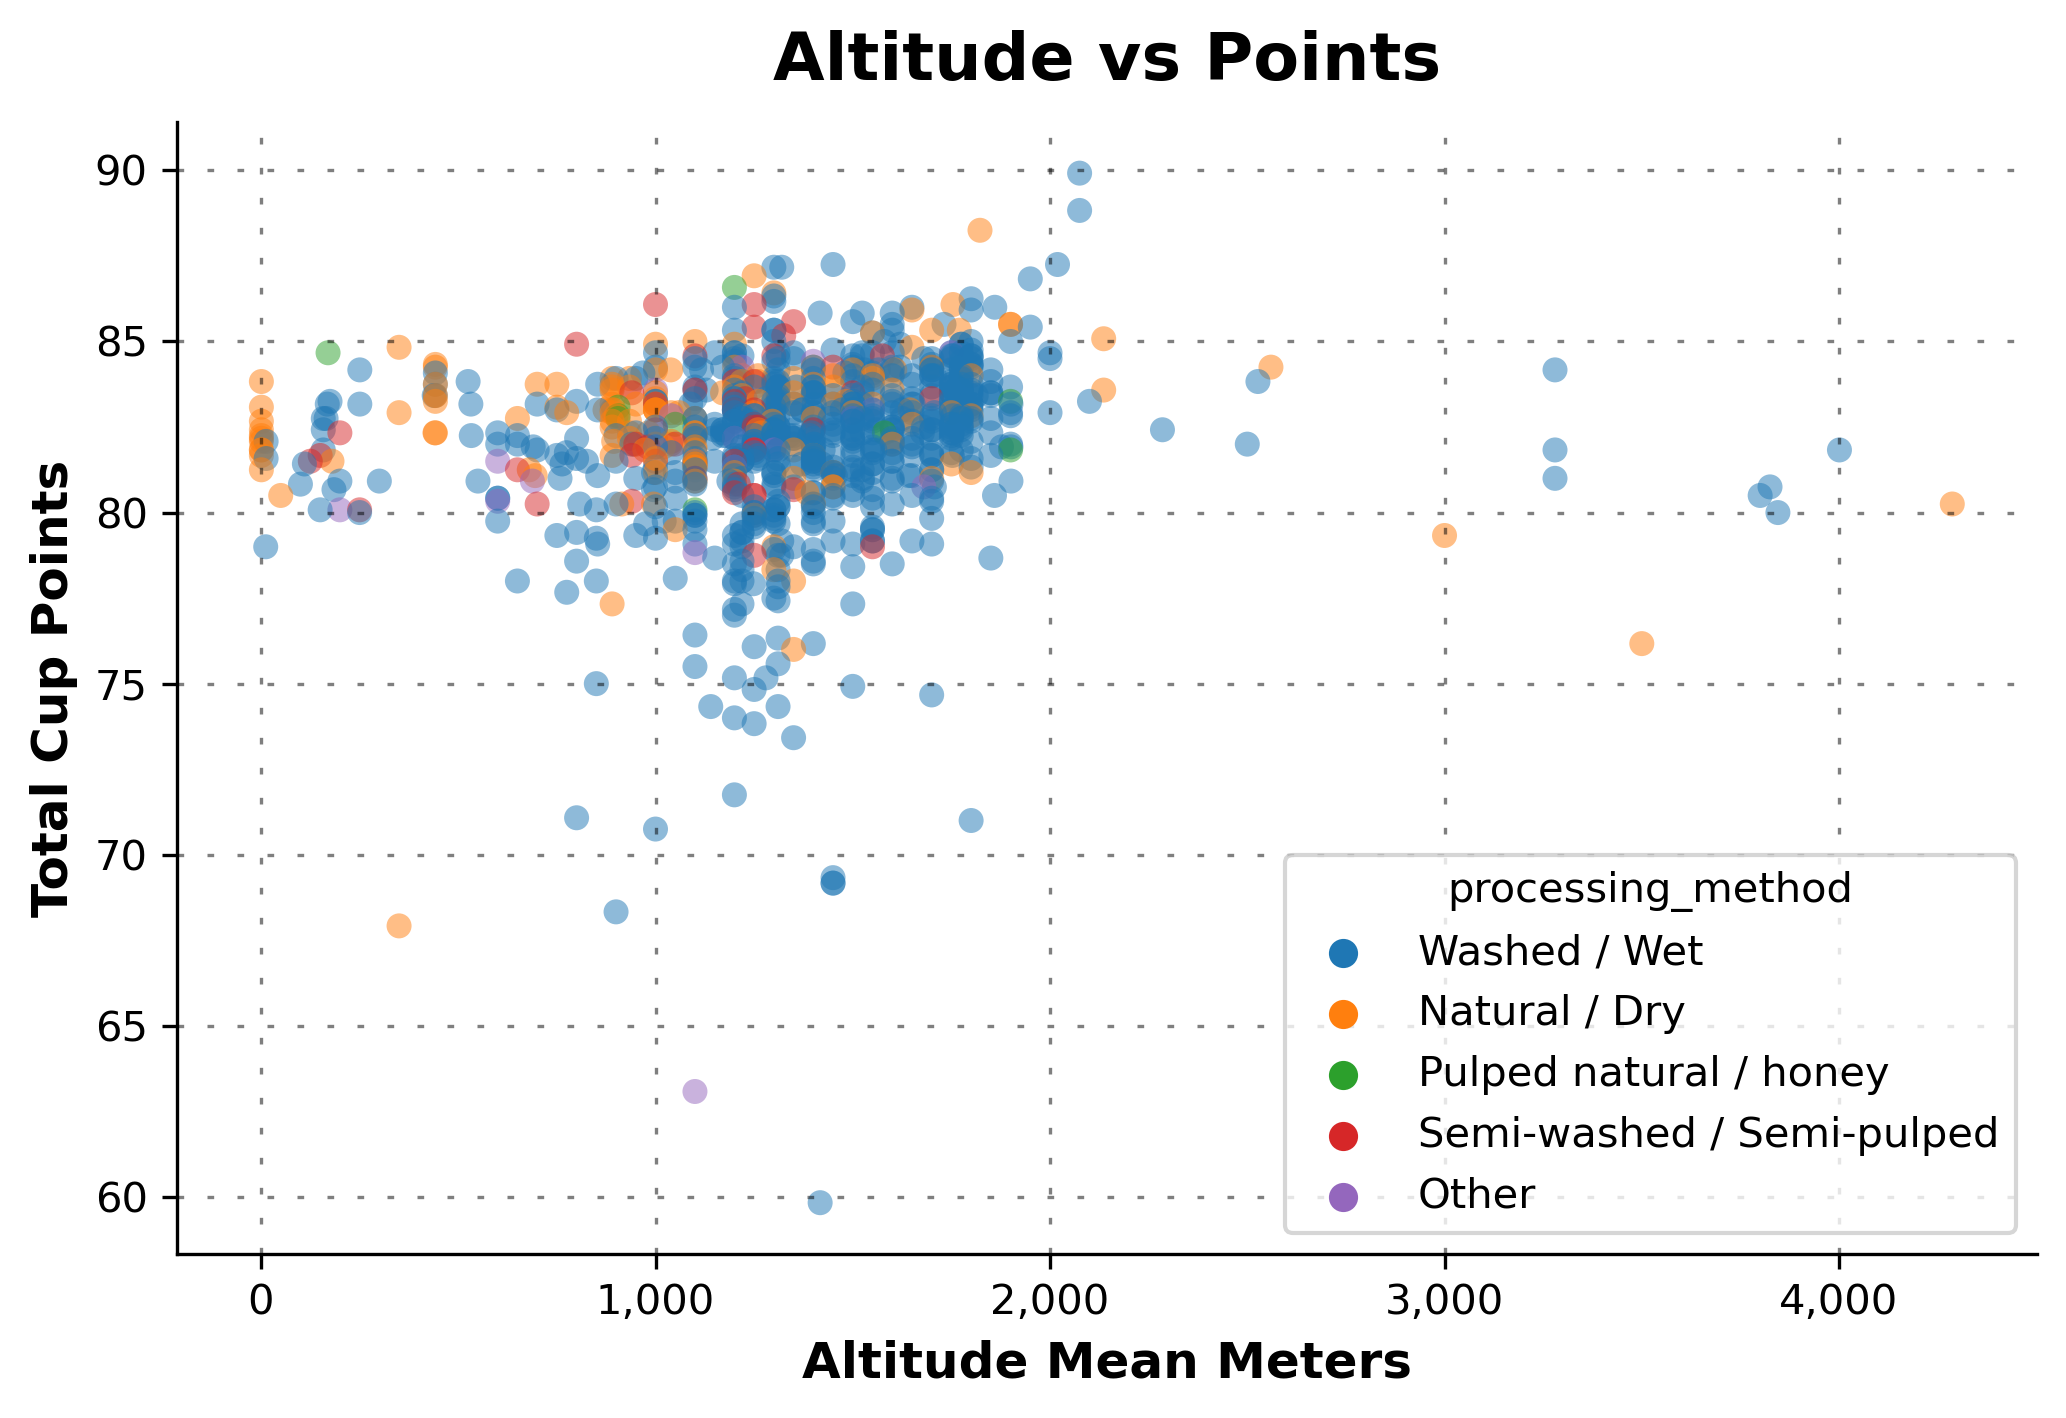

In [495]:
plt.figure(figsize= (8, 5), dpi= 300)
plt.grid(which='both', color='black', linestyle='--', dashes=(2,7), alpha= 0.5, zorder= 0)

ax= sns.scatterplot(data= df, x= "altitude_mean_meters", y= "total_cup_points", hue= "processing_method",
                   alpha= 0.5, linewidth=0, palette= "tab10")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

import matplotlib.ticker as tkr
ax.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Altitude vs Points", fontsize= 16, fontweight= "bold", pad= 10)
plt.ylabel(ax.yaxis.get_label().get_text().title().replace("_", " "), fontsize= 12, fontweight= "bold")
plt.xlabel(ax.xaxis.get_label().get_text().title().replace("_", " "), fontsize= 12, fontweight= "bold")
plt.show()

# ML Model

## Define Helper Function

In [392]:
def train_test_evaluate(model_name, model, X_train, y_train, X_test, y_test):  
    
    model.fit(X_train, y_train)
    
    y_pred= model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    y_mean= (pd.concat([y_train, y_test])).mean()
    mae_ratio= mae/y_mean
    rmse_ratio= rmse/y_mean
    avg_error_ratio= (mae_ratio + rmse_ratio)/2 
    
    result_df = pd.DataFrame(
        data=[[model_name, mae, mse, rmse, r2, mae_ratio, rmse_ratio, avg_error_ratio]], 
        columns=["Model", 'MAE', 'MSE', 'RMSE', 'R2 Score', "MAE Ratio", "RMSE Ratio", "Avg Error Ratio"])
    return result_df

In [393]:
def test_evaluate_hyperparameter(model_name, model, X_test, y_test, y_train):  

    y_pred= model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    y_mean= (pd.concat([y_train, y_test])).mean()
    mae_ratio= mae/y_mean
    rmse_ratio= rmse/y_mean
    avg_error_ratio= (mae_ratio + rmse_ratio)/2 
    
    result_df = pd.DataFrame(
        data=[[model_name, mae, mse, rmse, r2, mae_ratio, rmse_ratio, avg_error_ratio]], 
        columns=["Model", 'MAE', 'MSE', 'RMSE', 'R2 Score', "MAE Ratio", "RMSE Ratio", "Avg Error Ratio"])
    
    return result_df

## Feature Engineering

In [396]:
# get dummies

df_ml= pd.get_dummies(df)

In [397]:
X= df_ml.drop(columns= "total_cup_points")
y= df_ml["total_cup_points"]

In [398]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.20, random_state= 8)

In [399]:
#scale data

scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## Model Selection

### Elasticnet Regression

In [400]:
el_model= ElasticNet()

result_df= train_test_evaluate("Elastic Net", svr_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262,1.809492,0.184427,0.015897,0.022052,0.018975


### Kernel Ridge

In [401]:
kernel_model= KernelRidge()

result_df_2= train_test_evaluate("Kernel Ridge", kernel_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262,1.809492,0.184427,0.015897,0.022052,0.018975
1,Kernel Ridge,82.352389,6785.542395,82.374404,-1689.183794,1.003598,1.003866,1.003732


### SVR

In [402]:
svr_model= SVR()

result_df_2= train_test_evaluate("SVR", svr_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262,1.809492,0.184427,0.015897,0.022052,0.018975
1,SVR,1.304496,3.274262,1.809492,0.184427,0.015897,0.022052,0.018975
2,Kernel Ridge,82.352389,6785.542395,82.374404,-1689.183794,1.003598,1.003866,1.003732


### SGD

In [403]:
sgd_model= SGDRegressor()

result_df_2= train_test_evaluate("SGD", sgd_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
1,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
2,Kernel Ridge,82.352389,6.785542e+03,82.374404,-1689.183794,1.003598,1.003866,1.003732
3,SGD,200.596239,1.416090e+06,1189.995965,-352727.330062,2.444592,14.502039,8.473316


### KNN

In [404]:
knn_model= KNeighborsRegressor()

result_df_2= train_test_evaluate("KNN", knn_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
1,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
2,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787
3,Kernel Ridge,82.352389,6.785542e+03,82.374404,-1689.183794,1.003598,1.003866,1.003732
4,SGD,200.596239,1.416090e+06,1189.995965,-352727.330062,2.444592,14.502039,8.473316


### Decision Tree

In [405]:
dt_model= DecisionTreeRegressor()

result_df_2= train_test_evaluate("Decision Tree", dt_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
1,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
2,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787
3,Decision Tree,1.810637,9.039284e+00,3.006540,-1.251559,0.022066,0.036640,0.029353
4,Kernel Ridge,82.352389,6.785542e+03,82.374404,-1689.183794,1.003598,1.003866,1.003732
5,SGD,200.596239,1.416090e+06,1189.995965,-352727.330062,2.444592,14.502039,8.473316


### Random Forest

In [406]:
rf_model= RandomForestRegressor()

result_df_2= train_test_evaluate("Random Forest", rf_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
1,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
2,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735
3,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787
4,Decision Tree,1.810637,9.039284e+00,3.006540,-1.251559,0.022066,0.036640,0.029353
5,Kernel Ridge,82.352389,6.785542e+03,82.374404,-1689.183794,1.003598,1.003866,1.003732
6,SGD,200.596239,1.416090e+06,1189.995965,-352727.330062,2.444592,14.502039,8.473316


### Adaboost

In [407]:
ada_model= AdaBoostRegressor()

result_df_2= train_test_evaluate("Adaboost", ada_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
1,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
2,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735
3,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787
4,Decision Tree,1.810637,9.039284e+00,3.006540,-1.251559,0.022066,0.036640,0.029353
5,Adaboost,2.223074,7.295592e+00,2.701035,-0.817230,0.027092,0.032917,0.030004
6,Kernel Ridge,82.352389,6.785542e+03,82.374404,-1689.183794,1.003598,1.003866,1.003732
7,SGD,200.596239,1.416090e+06,1189.995965,-352727.330062,2.444592,14.502039,8.473316


### Gradient Boosting

In [408]:
gb_model= GradientBoostingRegressor()

result_df_2= train_test_evaluate("Gradient Boosting", gb_model, X_train_scaled, y_train, X_test_scaled, y_test)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
1,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
2,Gradient Boosting,1.345930,3.395179e+00,1.842601,0.154308,0.016402,0.022455,0.019429
3,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735
4,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787
5,Decision Tree,1.810637,9.039284e+00,3.006540,-1.251559,0.022066,0.036640,0.029353
6,Adaboost,2.223074,7.295592e+00,2.701035,-0.817230,0.027092,0.032917,0.030004
7,Kernel Ridge,82.352389,6.785542e+03,82.374404,-1689.183794,1.003598,1.003866,1.003732
8,SGD,200.596239,1.416090e+06,1189.995965,-352727.330062,2.444592,14.502039,8.473316


## Evaluation

In [409]:
result_df.round(5)

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.30450,3.274260e+00,1.80949,0.18443,0.01590,0.02205,0.01897
1,SVR,1.30450,3.274260e+00,1.80949,0.18443,0.01590,0.02205,0.01897
2,Gradient Boosting,1.34593,3.395180e+00,1.84260,0.15431,0.01640,0.02246,0.01943
3,Random Forest,1.40353,3.368400e+00,1.83532,0.16098,0.01710,0.02237,0.01974
4,KNN,1.37820,3.493910e+00,1.86920,0.12972,0.01680,0.02278,0.01979
5,Decision Tree,1.81064,9.039280e+00,3.00654,-1.25156,0.02207,0.03664,0.02935
6,Adaboost,2.22307,7.295590e+00,2.70104,-0.81723,0.02709,0.03292,0.03000
7,Kernel Ridge,82.35239,6.785542e+03,82.37440,-1689.18379,1.00360,1.00387,1.00373
8,SGD,200.59624,1.416090e+06,1189.99596,-352727.33006,2.44459,14.50204,8.47332


## Hyperparameter Tuning

### Tuned 1

In [410]:
el_model= ElasticNet()

param_grid= {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1],
    "l1_ratio": [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1],
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= el_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

C:\Users\Anjelito\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+03, tolerance: 3.607e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anjelito\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+03, tolerance: 4.614e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anjelito\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

C:\Users\Anjelito\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.386e+02, tolerance: 4.749e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anjelito\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e+02, tolerance: 3.607e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anjelito\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

C:\Users\Anjelito\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.240e+03, tolerance: 3.826e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anjelito\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+03, tolerance: 4.617e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anjelito\anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1],
                         'l1_ratio': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.7, 0.9,
                                      1],
                         'random_state': [8]})

In [411]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 0.001, 'random_state': 8}

In [412]:
result_df_2= test_evaluate_hyperparameter("Elastic Net Tuned 1", grid_model, X_test_scaled, y_test, y_train)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
1,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
2,Gradient Boosting,1.345930,3.395179e+00,1.842601,0.154308,0.016402,0.022455,0.019429
3,Elastic Net Tuned 1,1.364709,3.405053e+00,1.845279,0.151849,0.016631,0.022488,0.019559
4,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735
5,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787
6,Decision Tree,1.810637,9.039284e+00,3.006540,-1.251559,0.022066,0.036640,0.029353
7,Adaboost,2.223074,7.295592e+00,2.701035,-0.817230,0.027092,0.032917,0.030004
8,Kernel Ridge,82.352389,6.785542e+03,82.374404,-1689.183794,1.003598,1.003866,1.003732
9,SGD,200.596239,1.416090e+06,1189.995965,-352727.330062,2.444592,14.502039,8.473316


### Tuned 2

In [413]:
el_model= ElasticNet()

param_grid= {
    "alpha": [0.95, 0.98, 1, 1.2],
    "l1_ratio": [0.009, 0.01, 0.02, 0.05],
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= el_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.95, 0.98, 1, 1.2],
                         'l1_ratio': [0.009, 0.01, 0.02, 0.05],
                         'random_state': [8]})

In [414]:
grid_model.best_params_

{'alpha': 0.95, 'l1_ratio': 0.009, 'random_state': 8}

In [415]:
result_df_2= test_evaluate_hyperparameter("Elastic Net Tuned 2", grid_model, X_test_scaled, y_test, y_train)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
1,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
2,Gradient Boosting,1.345930,3.395179e+00,1.842601,0.154308,0.016402,0.022455,0.019429
3,Elastic Net Tuned 1,1.364709,3.405053e+00,1.845279,0.151849,0.016631,0.022488,0.019559
4,Elastic Net Tuned 2,1.365185,3.407512e+00,1.845945,0.151236,0.016637,0.022496,0.019566
5,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735
6,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787
7,Decision Tree,1.810637,9.039284e+00,3.006540,-1.251559,0.022066,0.036640,0.029353
8,Adaboost,2.223074,7.295592e+00,2.701035,-0.817230,0.027092,0.032917,0.030004
9,Kernel Ridge,82.352389,6.785542e+03,82.374404,-1689.183794,1.003598,1.003866,1.003732


## SVR

### Tuned 1

In [416]:
svr_model= SVR()

param_grid= {
    "kernel": ["linear", "poly", "rbf"],
    "degree": [1, 2, 3],
    "C": [0.1, 1, 2],
    "epsilon": [0.1, 0.5, 1, 2]
}

grid_model= GridSearchCV(estimator= svr_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 2], 'degree': [1, 2, 3],
                         'epsilon': [0.1, 0.5, 1, 2],
                         'kernel': ['linear', 'poly', 'rbf']})

In [417]:
grid_model.best_params_

{'C': 2, 'degree': 1, 'epsilon': 1, 'kernel': 'rbf'}

In [418]:
result_df_2= test_evaluate_hyperparameter("SVR Tuned 1", grid_model, X_test_scaled, y_test, y_train)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,SVR Tuned 1,1.282927,3.142075e+00,1.772590,0.217353,0.015635,0.021602,0.018618
1,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
2,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
3,Gradient Boosting,1.345930,3.395179e+00,1.842601,0.154308,0.016402,0.022455,0.019429
4,Elastic Net Tuned 1,1.364709,3.405053e+00,1.845279,0.151849,0.016631,0.022488,0.019559
5,Elastic Net Tuned 2,1.365185,3.407512e+00,1.845945,0.151236,0.016637,0.022496,0.019566
6,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735
7,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787
8,Decision Tree,1.810637,9.039284e+00,3.006540,-1.251559,0.022066,0.036640,0.029353
9,Adaboost,2.223074,7.295592e+00,2.701035,-0.817230,0.027092,0.032917,0.030004


### Tuned 2

In [419]:
svr_model= SVR()

param_grid= {
    "kernel": ["rbf"],
    "C": [1.5, 2, 3, 5],
    "epsilon": [0.9, 1, 1.1, 1.5]
}

grid_model= GridSearchCV(estimator= svr_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.5, 2, 3, 5], 'epsilon': [0.9, 1, 1.1, 1.5],
                         'kernel': ['rbf']})

In [420]:
grid_model.best_params_

{'C': 2, 'epsilon': 1.5, 'kernel': 'rbf'}

In [421]:
result_df_2= test_evaluate_hyperparameter("SVR Tuned 2", grid_model, X_test_scaled, y_test, y_train)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,SVR Tuned 1,1.282927,3.142075e+00,1.772590,0.217353,0.015635,0.021602,0.018618
1,SVR Tuned 2,1.314922,3.200625e+00,1.789029,0.202769,0.016024,0.021802,0.018913
2,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
3,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
4,Gradient Boosting,1.345930,3.395179e+00,1.842601,0.154308,0.016402,0.022455,0.019429
5,Elastic Net Tuned 1,1.364709,3.405053e+00,1.845279,0.151849,0.016631,0.022488,0.019559
6,Elastic Net Tuned 2,1.365185,3.407512e+00,1.845945,0.151236,0.016637,0.022496,0.019566
7,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735
8,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787
9,Decision Tree,1.810637,9.039284e+00,3.006540,-1.251559,0.022066,0.036640,0.029353


## Random Forest

### Tuned 1

In [422]:
rf_model= RandomForestRegressor()

param_grid= {
    "n_estimators": list(range(80, 160, 20)),
    "max_depth": list(range(2, 11, 2)),
    "min_samples_leaf": list(range(1, 3)),
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= rf_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [80, 100, 120, 140],
                         'random_state': [8]})

In [423]:
grid_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'n_estimators': 140,
 'random_state': 8}

In [424]:
result_df_2= test_evaluate_hyperparameter("Random Forest Tuned 1", grid_model, X_test_scaled, y_test, y_train)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Random Forest Tuned 1,1.311624,2.878251e+00,1.696541,0.283068,0.015984,0.020675,0.018330
1,SVR Tuned 1,1.282927,3.142075e+00,1.772590,0.217353,0.015635,0.021602,0.018618
2,SVR Tuned 2,1.314922,3.200625e+00,1.789029,0.202769,0.016024,0.021802,0.018913
3,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
4,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
5,Gradient Boosting,1.345930,3.395179e+00,1.842601,0.154308,0.016402,0.022455,0.019429
6,Elastic Net Tuned 1,1.364709,3.405053e+00,1.845279,0.151849,0.016631,0.022488,0.019559
7,Elastic Net Tuned 2,1.365185,3.407512e+00,1.845945,0.151236,0.016637,0.022496,0.019566
8,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735
9,KNN,1.378199,3.493906e+00,1.869199,0.129717,0.016796,0.022779,0.019787


### Tuned 2

In [425]:
rf_model= RandomForestRegressor()

param_grid= {
    "n_estimators": list(range(130, 160, 10)),
    "max_depth": list(range(10, 20, 2)),
    "min_samples_leaf": list(range(2, 7, 2)),
    "random_state": [8]
}

grid_model= GridSearchCV(estimator= rf_model, param_grid= param_grid)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 14, 16, 18],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [130, 140, 150], 'random_state': [8]})

In [426]:
grid_model.best_params_

{'max_depth': 12,
 'min_samples_leaf': 4,
 'n_estimators': 140,
 'random_state': 8}

In [427]:
result_df_2= test_evaluate_hyperparameter("Random Forest Tuned 2", grid_model, X_test_scaled, y_test, y_train)
result_df = result_df.append(result_df_2, ignore_index=True)
result_df= result_df.sort_values("Avg Error Ratio", ignore_index= True)
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Random Forest Tuned 1,1.311624,2.878251e+00,1.696541,0.283068,0.015984,0.020675,0.018330
1,SVR Tuned 1,1.282927,3.142075e+00,1.772590,0.217353,0.015635,0.021602,0.018618
2,Random Forest Tuned 2,1.329013,3.101236e+00,1.761033,0.227526,0.016196,0.021461,0.018829
3,SVR Tuned 2,1.314922,3.200625e+00,1.789029,0.202769,0.016024,0.021802,0.018913
4,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
5,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
6,Gradient Boosting,1.345930,3.395179e+00,1.842601,0.154308,0.016402,0.022455,0.019429
7,Elastic Net Tuned 1,1.364709,3.405053e+00,1.845279,0.151849,0.016631,0.022488,0.019559
8,Elastic Net Tuned 2,1.365185,3.407512e+00,1.845945,0.151236,0.016637,0.022496,0.019566
9,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735


## Final Evaluation

In [428]:
result_df

,Model,MAE,MSE,RMSE,R2 Score,MAE Ratio,RMSE Ratio,Avg Error Ratio
0,Random Forest Tuned 1,1.311624,2.878251e+00,1.696541,0.283068,0.015984,0.020675,0.018330
1,SVR Tuned 1,1.282927,3.142075e+00,1.772590,0.217353,0.015635,0.021602,0.018618
2,Random Forest Tuned 2,1.329013,3.101236e+00,1.761033,0.227526,0.016196,0.021461,0.018829
3,SVR Tuned 2,1.314922,3.200625e+00,1.789029,0.202769,0.016024,0.021802,0.018913
4,Elastic Net,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
5,SVR,1.304496,3.274262e+00,1.809492,0.184427,0.015897,0.022052,0.018975
6,Gradient Boosting,1.345930,3.395179e+00,1.842601,0.154308,0.016402,0.022455,0.019429
7,Elastic Net Tuned 1,1.364709,3.405053e+00,1.845279,0.151849,0.016631,0.022488,0.019559
8,Elastic Net Tuned 2,1.365185,3.407512e+00,1.845945,0.151236,0.016637,0.022496,0.019566
9,Random Forest,1.403535,3.368397e+00,1.835319,0.160979,0.017104,0.022366,0.019735


In [452]:
result_df_viz= result_df[~result_df["Model"].isin(["Kernel Ridge", "SGD", "Decision Tree", "Adaboost"])]
result_df_viz= result_df_viz.set_index("Model")

result_df_viz["Neg R2 Score"]= -result_df_viz["R2 Score"]

result_df_viz= result_df_viz[['MAE', 'MSE', 'RMSE', 'Neg R2 Score', 'MAE Ratio', 'RMSE Ratio',
       'Avg Error Ratio']]

scaler= MinMaxScaler((0, 100))
result_df_viz_scaled= scaler.fit_transform(result_df_viz)

result_df_viz_scaled= pd.DataFrame(result_df_viz_scaled, index= result_df_viz.index, columns= result_df_viz.columns)

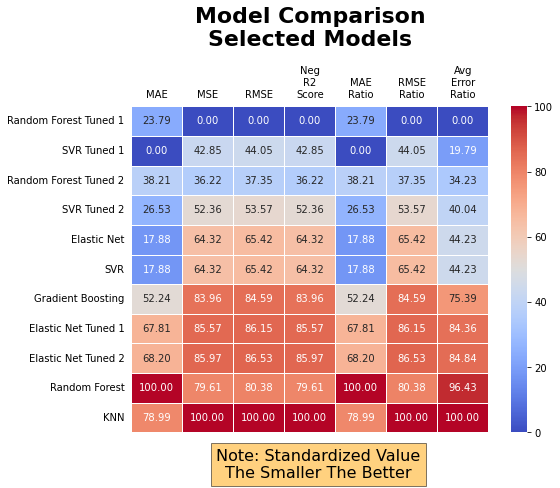

In [457]:
plt.figure(figsize= (8, 6))

ax= sns.heatmap(result_df_viz_scaled, annot=True, fmt=".2f", cmap=cmap, linewidths= 1)

ax.xaxis.tick_top()
ax.set_xticklabels([textwrap.fill(e, 5) for e in result_df_viz_scaled.columns])
ax.tick_params(left=False, top=False)

plt.title("Model Comparison\nSelected Models", fontsize= 22, fontweight= "bold", pad= 20)
plt.figtext(0.45, 0.02, "Note: Standardized Value\nThe Smaller The Better", ha="center", fontsize= 16, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.ylabel("")

plt.show()

In [458]:
rf_model= RandomForestRegressor(
    max_depth= 10,
    min_samples_leaf= 2,
    n_estimators= 140,
    random_state= 8)

rf_model.fit(X_train_scaled, y_train)

y_pred= rf_model.predict(X_test_scaled)

In [472]:
prediction_df= pd.DataFrame(data= [y_test.values, y_pred])

prediction_df= prediction_df.transpose()
prediction_df.columns= ["y_true", "y_pred"]
prediction_df= prediction_df.round(2)
prediction_df["diff"]= prediction_df["y_true"] - prediction_df["y_pred"]
prediction_df.head()

,y_true,y_pred,diff
0,83.58,82.63,0.95
1,77.17,81.69,-4.52
2,83.17,82.57,0.60
3,80.50,83.11,-2.61
4,83.00,82.31,0.69


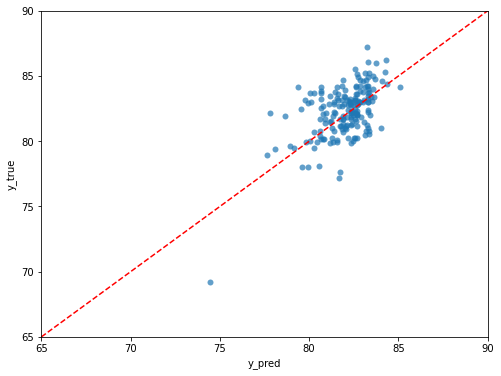

In [552]:
plt.figure(figsize= (8, 6))

ax= sns.scatterplot(data= prediction_df, x= "y_pred", y= "y_true", palette= ["#233773"], linewidth=0, alpha = 0.7)

ax.axline((1, 1), slope=1, color = "red", linestyle= "--")

plt.xlim(65, 90)
plt.ylim(65, 90)

plt.show()

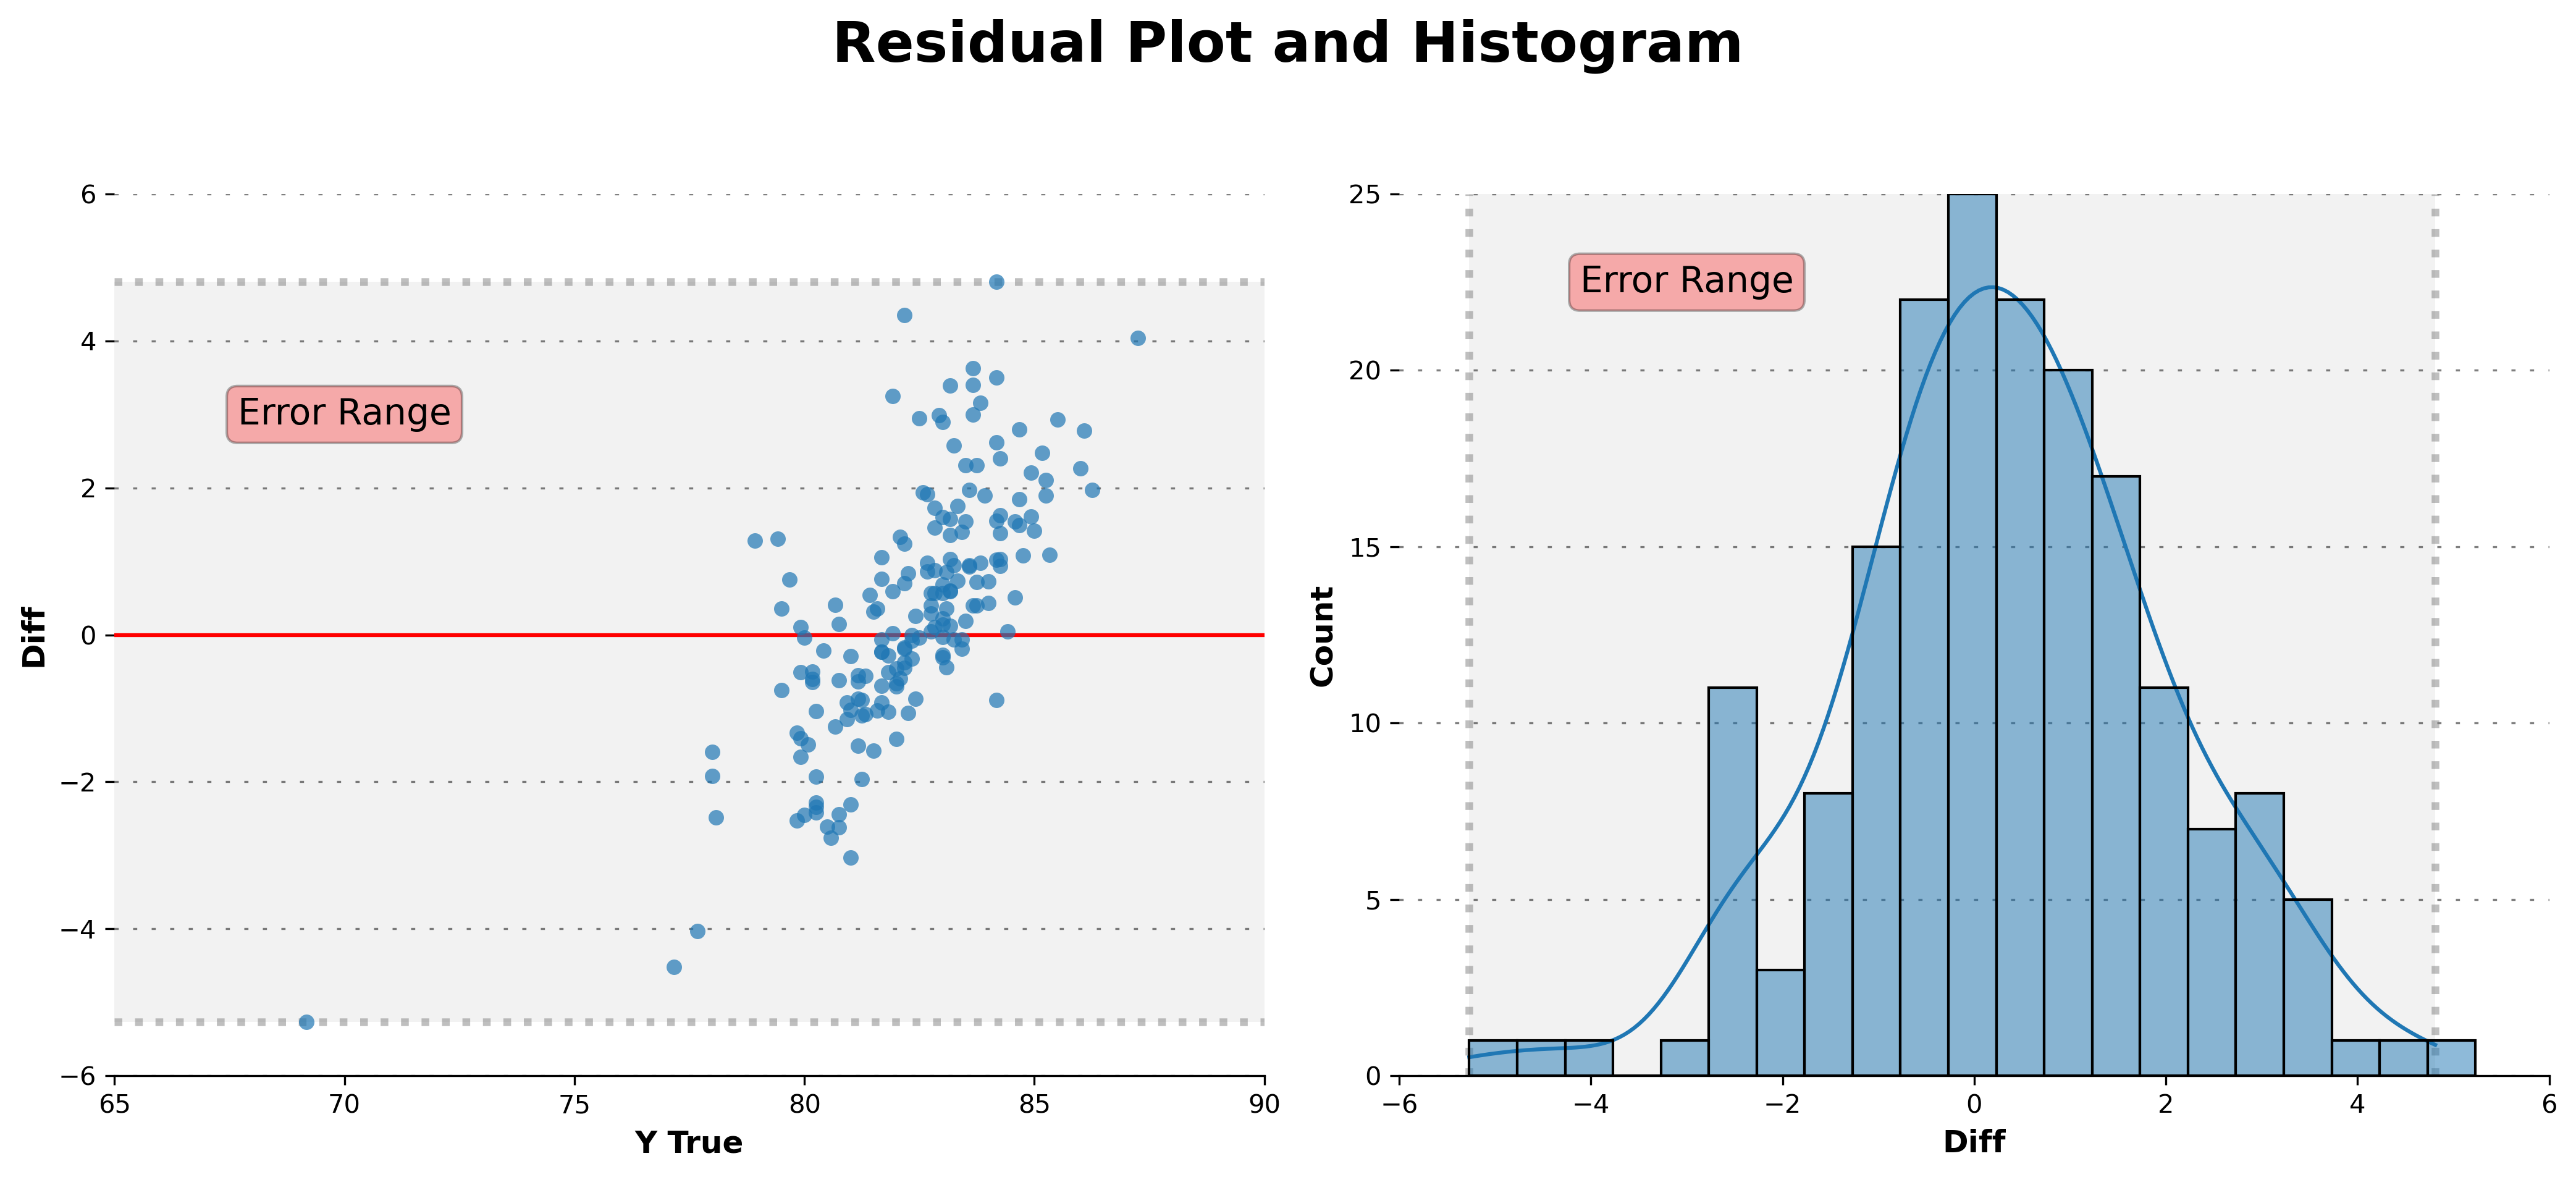

In [561]:
fig, ax = plt.subplots(ncols=2, figsize= (14, 6))

sns.scatterplot(data= prediction_df, x= "y_true", y= "diff",linewidth=0, alpha = 0.7, ax= ax[0], zorder= 5)
ax[0].set_xlim(65, 90)
ax[0].set_ylim(-6, 6)
ax[0].axhline(y= 0, color= "red")

ax[0].axhline(prediction_df["diff"].min(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[0].axhline(prediction_df["diff"].max(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[0].axhspan(prediction_df["diff"].min(), prediction_df["diff"].max(), facecolor='grey', alpha=0.1, zorder= 0)
ax[0].text(x= 70, y= 3, s= "Error Range", color='black', ha="center", va="center", fontstretch= "normal",
           alpha= 1, fontsize= 14, bbox= dict(facecolor='red', alpha= 0.3, boxstyle="round"))

sns.histplot(data= prediction_df, x= "diff", binwidth=0.5, kde= True, ax= ax[1], zorder= 5)
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(0, 25)
ax[1].set_yticks(list(range(0, 30, 5)))

ax[1].axvline(prediction_df["diff"].min(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[1].axvline(prediction_df["diff"].max(), linestyle= ":", linewidth= 3, color= "grey", alpha=0.5)
ax[1].axvspan(prediction_df["diff"].min(), prediction_df["diff"].max(), facecolor='grey', alpha=0.1, zorder= 0)
ax[1].text(x= -3, y= 22.5, s= "Error Range", color='black', ha="center", va="center", fontstretch= "normal",
           alpha= 1, fontsize= 14, bbox= dict(facecolor='red', alpha= 0.3, boxstyle="round"))

plt.suptitle("Residual Plot and Histogram", fontsize= 22, fontweight= "bold", y= 1.05)

for i in [0, 1]:
    ax[i].set_ylabel(ax[i].yaxis.get_label().get_text().title().replace("_", " "), fontsize= 12, fontweight= "bold")
    ax[i].set_xlabel(ax[i].xaxis.get_label().get_text().title().replace("_", " "), fontsize= 12, fontweight= "bold")
    ax[i].grid(axis='y', color='black', linestyle=':', dashes=(2,7), alpha= 0.5, zorder= 0)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
plt.tight_layout()
plt.savefig("residual_plot.png", facecolor='w', edgecolor='w', transparent=False, bbox_inches="tight")
plt.show()